In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Holiday_Package (1).csv')

In [3]:
data

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
data

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [7]:
data.shape

(872, 7)

In [8]:
## numerical feature
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [9]:
numerical_features

['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']

In [10]:
## continuous and discrete features
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) < 25] 
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['ID']]

In [11]:
discrete_features

['educ', 'no_young_children', 'no_older_children']

In [12]:
continuous_features

['Salary', 'age']

In [13]:
## categorical feature
categorical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [14]:
categorical_feature

['Holliday_Package', 'foreign']

In [15]:
## Descriptive analysis

# mean
data[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']].mean()

Salary               47729.172018
age                     39.955275
educ                     9.307339
no_young_children        0.311927
no_older_children        0.982798
dtype: float64

In [16]:
#median
data[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']].median()

Salary               41903.5
age                     39.0
educ                     9.0
no_young_children        0.0
no_older_children        1.0
dtype: float64

In [17]:
#mode
data[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']].mode()

,Salary,age,educ,no_young_children,no_older_children
0,32197,44.0,8.0,0.0,0.0
1,33357,NaN,NaN,NaN,NaN
2,35341,NaN,NaN,NaN,NaN
3,36976,NaN,NaN,NaN,NaN
4,39460,NaN,NaN,NaN,NaN
5,40270,NaN,NaN,NaN,NaN
6,44280,NaN,NaN,NaN,NaN
7,46195,NaN,NaN,NaN,NaN


In [18]:
data[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']].std()

Salary               23418.668531
age                     10.551675
educ                     3.036259
no_young_children        0.612870
no_older_children        1.086786
dtype: float64

In [19]:
data[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']].var()

Salary               5.484340e+08
age                  1.113378e+02
educ                 9.218867e+00
no_young_children    3.756096e-01
no_older_children    1.181104e+00
dtype: float64

In [20]:
data[['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']].skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

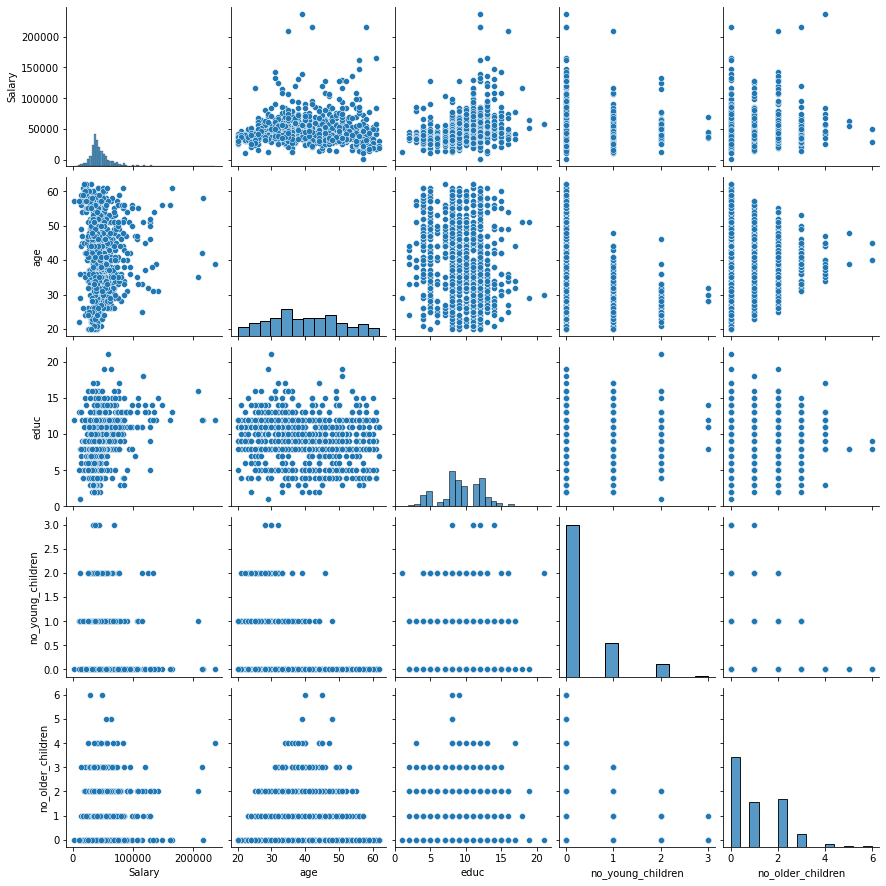

In [21]:
sns.pairplot(data)

Text(0.5, 1.0, 'Correlation Heatmap')

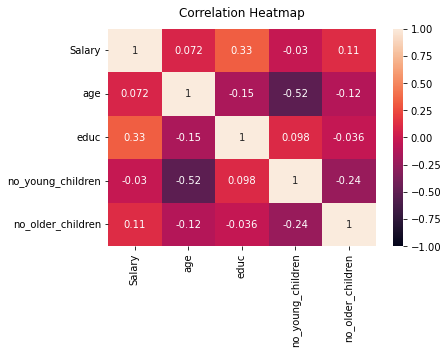

In [22]:
## EDA
heatmap=sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

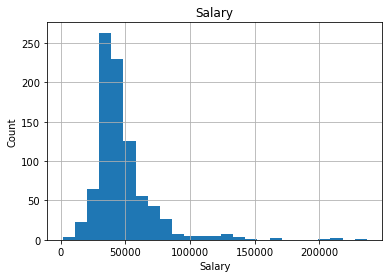

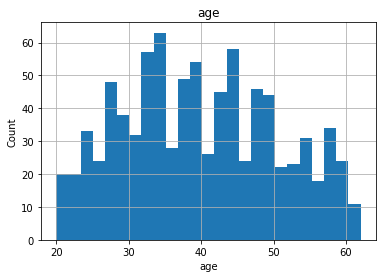

In [23]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

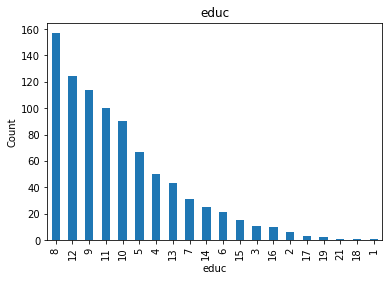

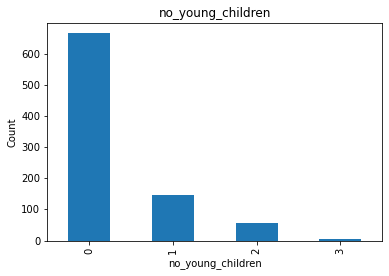

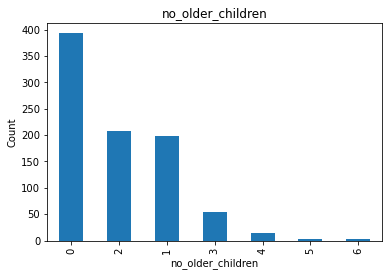

In [24]:
## Lets analyse the discrete values by creating histograms to understand the distribution

for feature in discrete_features:
    dataset=data.copy()
    dataset[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

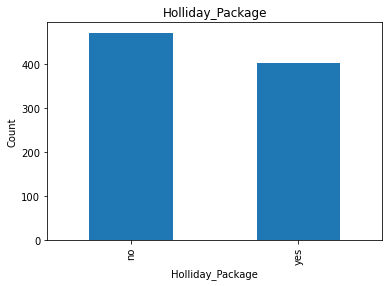

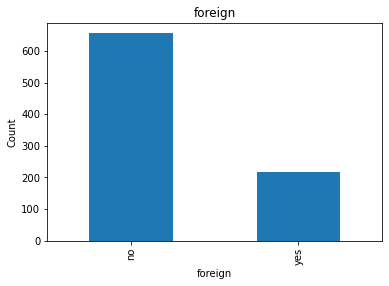

In [25]:
## Lets analyse the categorical values by creating histograms to understand the distribution

for feature in categorical_feature:
    dataset=data.copy()
    dataset[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

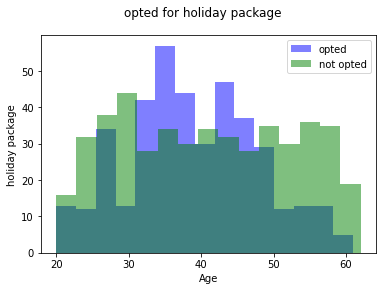

In [26]:
fig, ax = plt.subplots()

ax.hist(data[data["Holliday_Package"]=='yes']["age"], bins=15, alpha=0.5, color="blue", label="opted")
ax.hist(data[data["Holliday_Package"]=='no']["age"], bins=15, alpha=0.5, color="green", label="not opted")

ax.set_xlabel("Age")
ax.set_ylabel("holiday package")

fig.suptitle("opted for holiday package")

ax.legend();

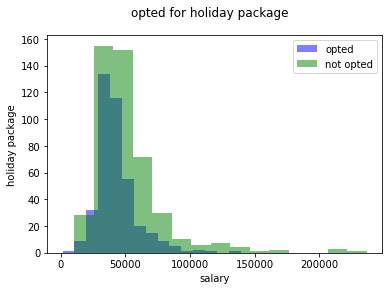

In [27]:
fig, ax = plt.subplots()

ax.hist(data[data["Holliday_Package"]=='yes']["Salary"], bins=15, alpha=0.5, color="blue", label="opted")
ax.hist(data[data["Holliday_Package"]=='no']["Salary"], bins=15, alpha=0.5, color="green", label="not opted")

ax.set_xlabel("salary")
ax.set_ylabel("holiday package")

fig.suptitle("opted for holiday package")

ax.legend();

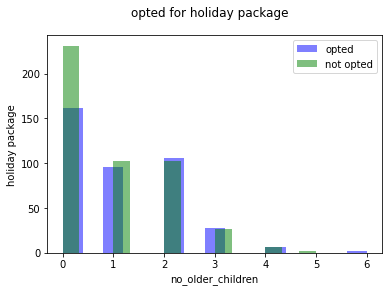

In [28]:
fig, ax = plt.subplots()

ax.hist(data[data["Holliday_Package"]=='yes']["no_older_children"], bins=15, alpha=0.5, color="blue", label="opted")
ax.hist(data[data["Holliday_Package"]=='no']["no_older_children"], bins=15, alpha=0.5, color="green", label="not opted")

ax.set_xlabel("no_older_children")
ax.set_ylabel("holiday package")

fig.suptitle("opted for holiday package")

ax.legend();

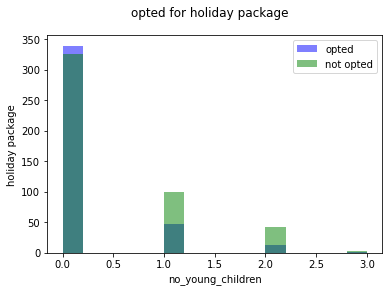

In [29]:
fig, ax = plt.subplots()

ax.hist(data[data["Holliday_Package"]=='yes']["no_young_children"], bins=15, alpha=0.5, color="blue", label="opted")
ax.hist(data[data["Holliday_Package"]=='no']["no_young_children"], bins=15, alpha=0.5, color="green", label="not opted")

ax.set_xlabel("no_young_children")
ax.set_ylabel("holiday package")

fig.suptitle("opted for holiday package")

ax.legend();

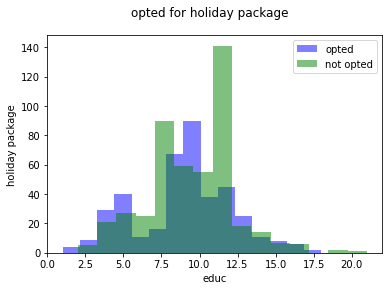

In [30]:
fig, ax = plt.subplots()

ax.hist(data[data["Holliday_Package"]=='yes']["educ"], bins=15, alpha=0.5, color="blue", label="opted")
ax.hist(data[data["Holliday_Package"]=='no']["educ"], bins=15, alpha=0.5, color="green", label="not opted")

ax.set_xlabel("educ")
ax.set_ylabel("holiday package")

fig.suptitle("opted for holiday package")

ax.legend();

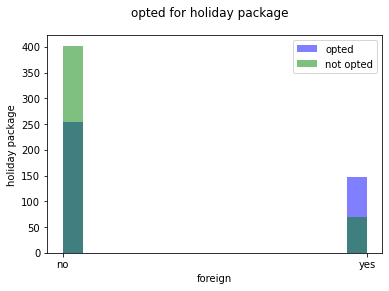

In [31]:
fig, ax = plt.subplots()

ax.hist(data[data["Holliday_Package"]=='yes']["foreign"], bins=15, alpha=0.5, color="blue", label="opted")
ax.hist(data[data["Holliday_Package"]=='no']["foreign"], bins=15, alpha=0.5, color="green", label="not opted")

ax.set_xlabel("foreign")
ax.set_ylabel("holiday package")

fig.suptitle("opted for holiday package")

ax.legend();